<h1><b>GENERATOR FOR BALANCED PAIRS<b><h1>

<h4>This notebook depicts subsampling the images, splitting them into training, validation and test, and mainly generating balanced pairs of images<h4>

Importing relevant libraries

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns', 50)

Importing a costume created module by Petr Nguyen

In [2]:
import src_PN.PN_functions as PN

Creating paths for saving generated data frames

In [3]:
if not os.path.exists('./csv/'):
    os.makedirs('./csv/')

Parameters' initialization

In [4]:
random_seed = 1234
test_size = 0.2
validation_size = 0.2
total_num_pairs = 5000
train_num_pairs = int((1 - test_size - validation_size)*total_num_pairs)
valid_num_pairs = int(validation_size*total_num_pairs)
test_num_pairs = int(test_size*total_num_pairs)

Reading and subsampling the images

In [5]:
identity_filtered, atts = PN.images_subsampling()

In [6]:
identity_filtered

,image,image_id
3,000004.jpg,5805
5,000006.jpg,4153
9,000010.jpg,612
23,000024.jpg,9290
25,000026.jpg,10046
...,...,...
202579,202580.jpg,9275
202584,202585.jpg,6758
202585,202586.jpg,7037
202593,202594.jpg,8984


In [7]:
atts

,image,w5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
3,000004.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,1,0,1
5,000006.jpg,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,1
9,000010.jpg,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1
23,000024.jpg,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
25,000026.jpg,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202579,202580.jpg,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
202584,202585.jpg,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
202585,202586.jpg,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
202593,202594.jpg,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1


Splitting the images into training, validation and test sets

In [8]:
train_imgs, train_labels, valid_imgs, valid_labels, test_imgs, test_labels = PN.images_split(identity_filtered, test_size, test_size, random_seed, True)

In [9]:
print(f'Number of images in the training set: {len(train_imgs)}')
print(f'Number of images in the validation set: {len(valid_imgs)}')
print(f'Number of images in the test set: {len(test_imgs)}')

Number of images in the training set: 32864
Number of images in the validation set: 10955
Number of images in the test set: 10955


Generating balanced pairs for training, validation and test sets

In [10]:
train_pairs = PN.pairs_generator(train_labels, train_imgs, atts, random_seed, 3000, 'train')

3000 unique balanced pairs generated                                                             

Total Run Time: 0.46 minutes 



In [11]:
valid_pairs = PN.pairs_generator(valid_labels, valid_imgs, atts, random_seed, valid_num_pairs, 'valid')

1000 unique balanced pairs generated                                                             

Total Run Time: 0.14 minutes 



In [12]:
test_pairs = PN.pairs_generator(test_labels, test_imgs, atts, random_seed, test_num_pairs, 'test')

1000 unique balanced pairs generated                                                             

Total Run Time: 0.16 minutes 



In [13]:
train_pairs

,img_1,img_2,label
1727,192943.jpg,012071.jpg,0
2514,079519.jpg,131122.jpg,1
1411,174948.jpg,130980.jpg,0
2738,036515.jpg,072860.jpg,1
432,118261.jpg,153563.jpg,1
...,...,...,...
1470,087666.jpg,148936.jpg,1
2655,168994.jpg,081950.jpg,0
513,090986.jpg,095212.jpg,0
2396,098243.jpg,130405.jpg,1


Checking the generated pairs

In [14]:
PN.pairs_check(train_pairs, atts)

Label distribution ... Negative: 1500 (50%) | Positive: 1500 (50%)
Number of unique pairs ... 3000
Number of pairs containing the same image ... 0
Number of images ... 2834
Gender distribution ... Female: 1500 (50%) | 1500: 1500 (50%)


In [15]:
PN.pairs_check(valid_pairs, atts)

Label distribution ... Positive: 500 (50%) | Negative: 500 (50%)
Number of unique pairs ... 1000
Number of pairs containing the same image ... 0
Number of images ... 990
Gender distribution ... Male: 500 (50%) | 500: 500 (50%)


In [16]:
PN.pairs_check(test_pairs, atts)

Label distribution ... Positive: 500 (50%) | Negative: 500 (50%)
Number of unique pairs ... 1000
Number of pairs containing the same image ... 0
Number of images ... 992
Gender distribution ... Male: 500 (50%) | 500: 500 (50%)


Plotting the pairs

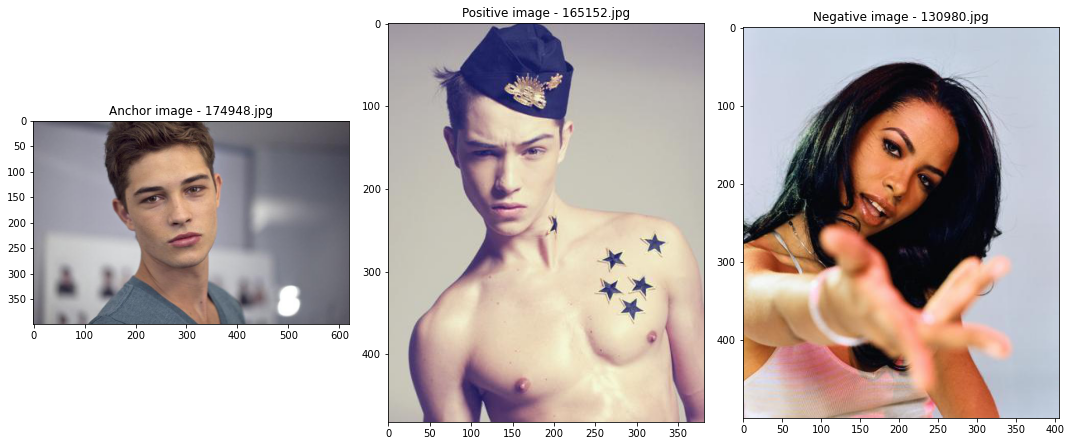

In [17]:
PN.plot_pairs(train_pairs, resize = False)

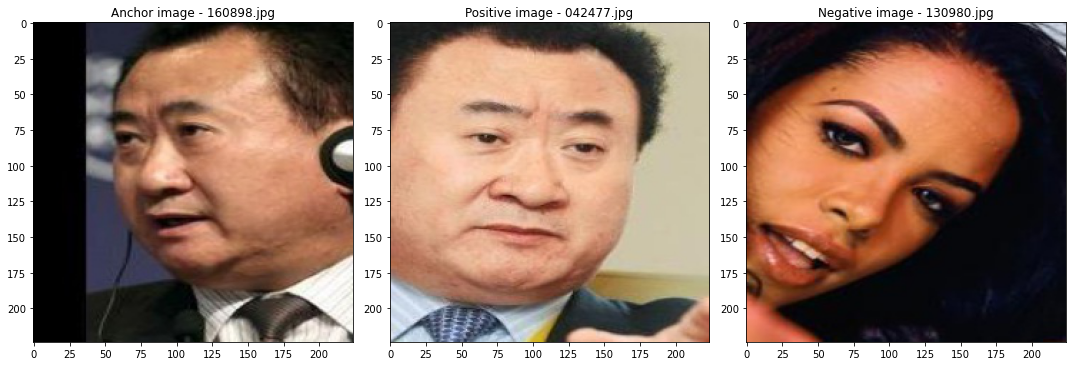

In [22]:
PN.plot_pairs(train_pairs, resize = True)